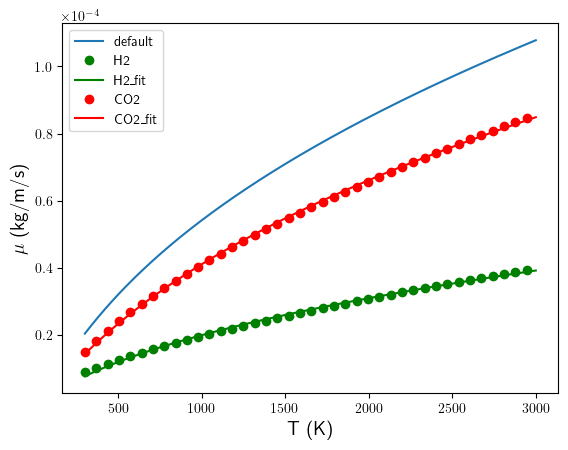

In [11]:
from pathlib import Path
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from oftrans import OFTrans

def sutherland(T, As, Ts):
    return As * np.sqrt(T) / (1 + Ts/T)



# Simulation parameters
p = ct.one_atm  # pressure [Pa]
Tin = 300.0  # unburned gas temperature [K]
reactants = 'OH:1'  # premixed gas composition
width = 0.03  # m
loglevel = 0  # amount of diagnostic output (0 to 8)

# generate the gas object
gas = ct.Solution('./chemkin/chem.yaml')
gas.TPX = Tin, p, reactants


Tvalues = np.linspace(300,3000,1000)
viscosities = np.zeros_like(Tvalues,dtype = np.float64)
for i,Tvalue in enumerate(Tvalues):
    gas.TP = Tvalue, p
    viscosities[i] = gas.viscosity
    
oftrans = OFTrans('./chemkin/chem.yaml')
oftrans.getSutherlandParams()
oftrans()

oftrans = OFTrans('./chemkin/chem.yaml')
oftrans.getSutherlandParams()
oftrans()


# test
Tvalues = oftrans.TList
# H2
muValues_H2 = oftrans.getMuList4Species("H2")
muValues_default = sutherland(Tvalues, 1.512e-6, 120.)
AS,TS = oftrans.sutherland_params["H2"]
muValues_H2_fit = sutherland(Tvalues, AS, TS)

# CO2
muValues_CO2 = oftrans.getMuList4Species("CO2")
muValues_default = sutherland(Tvalues, 2.125e-6, 240.)
AS,TS = oftrans.sutherland_params["CO2"]
muValues_CO2_fit = sutherland(Tvalues, AS, TS)

plt.plot(Tvalues, muValues_default, label="default")
plt.plot(Tvalues[::5], muValues_H2[::5], 'go',label="H2")
plt.plot(Tvalues, muValues_H2_fit, 'g',label="H2_fit")
plt.plot(Tvalues[::5], muValues_CO2[::5], 'ro', label="CO2")
plt.plot(Tvalues, muValues_CO2_fit, 'r',label="CO2_fit")

plt.ylabel("$\mu$ (kg/m/s)", fontsize=14)
plt.xlabel("T (K)", fontsize=14)

# scientific notation on y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.savefig("viscosity.png", dpi = 300)
